In [29]:
import numpy as np
import pandas as pd
from plotnine import *
from scipy import stats
import math

from sklearn.linear_model import LinearRegression

# Set the seed for reproducibility
np.random.seed(42)

In [21]:
!pip show plotnine

Name: plotnine
Version: 0.13.6
Summary: A Grammar of Graphics for Python
Home-page: 
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: The MIT License (MIT)

Copyright (c) 2022 Hassan Kibirige

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUT

In [17]:
def generate_data(sigma, slope, intercept, sample_size):
    X = np.linspace(start=1, stop=10, num=sample_size).reshape(-1, 1) #array w/ 1 column, the -1 means 'infer the # of rows'

    # Define parameters
    beta0 = intercept
    beta1 = slope
    
    # Generate epsilon as a 1D array of N(0, sigma^2) RVs
    epsilon = sigma * np.random.randn(sample_size)
    
    # Generate y using SLR model
    y = beta0 + beta1 * X.flatten() + epsilon

    return X, y 

In [22]:
def ss_decomp(X, y, alpha):

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)
    dfn = 1
    dfd = len(y) - 2
    F = SSR/dfn/(SSE/dfd)
    f_crit = stats.f.ppf(1 - alpha, dfn, dfd)

    if F > f_crit:
        inequality = 'greater'
        decision = 'reject'
        result = 'is'
    else:
        inequality = 'less'
        decision = 'do not reject'
        result = 'is not'

    # Output the sum of squares decomposition
    print(f"SST (Total Sum of Squares): {SST}")
    print(f"SSR (Regression Sum of Squares): {SSR}")
    print(f"SSE (Error Sum of Squares): {SSE}")
    print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
    print(f"Coefficient of Determination, R^2 is: {np.round(1-SSE/SST, 4)}")
    print(f"Since the F statistic, {F}, is {inequality} than the critical value, {f_crit}, then we {decision} the null hypothesis and say X {result} a significant predictor of Y")
    
    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        #geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', yend = 'y_mean'), color = "black") + #SST components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    gg2 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', y = 'predicted', yend = 'y_mean'), color = "blue", linetype = "dashed") + #SSR components 
        geom_segment(aes(xend = 'X',  yend = 'predicted'), color = "red", linetype = "dashed") + #SSE components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    return gg1, gg2

SST (Total Sum of Squares): 17753.5968
SSR (Regression Sum of Squares): 17427.6349
SSE (Error Sum of Squares): 325.9619
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9816
Since the F statistic, 5239.594628083834, is greater than the critical value, 3.938111078003373, then we reject the null hypothesis and say X is a significant predictor of Y


/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


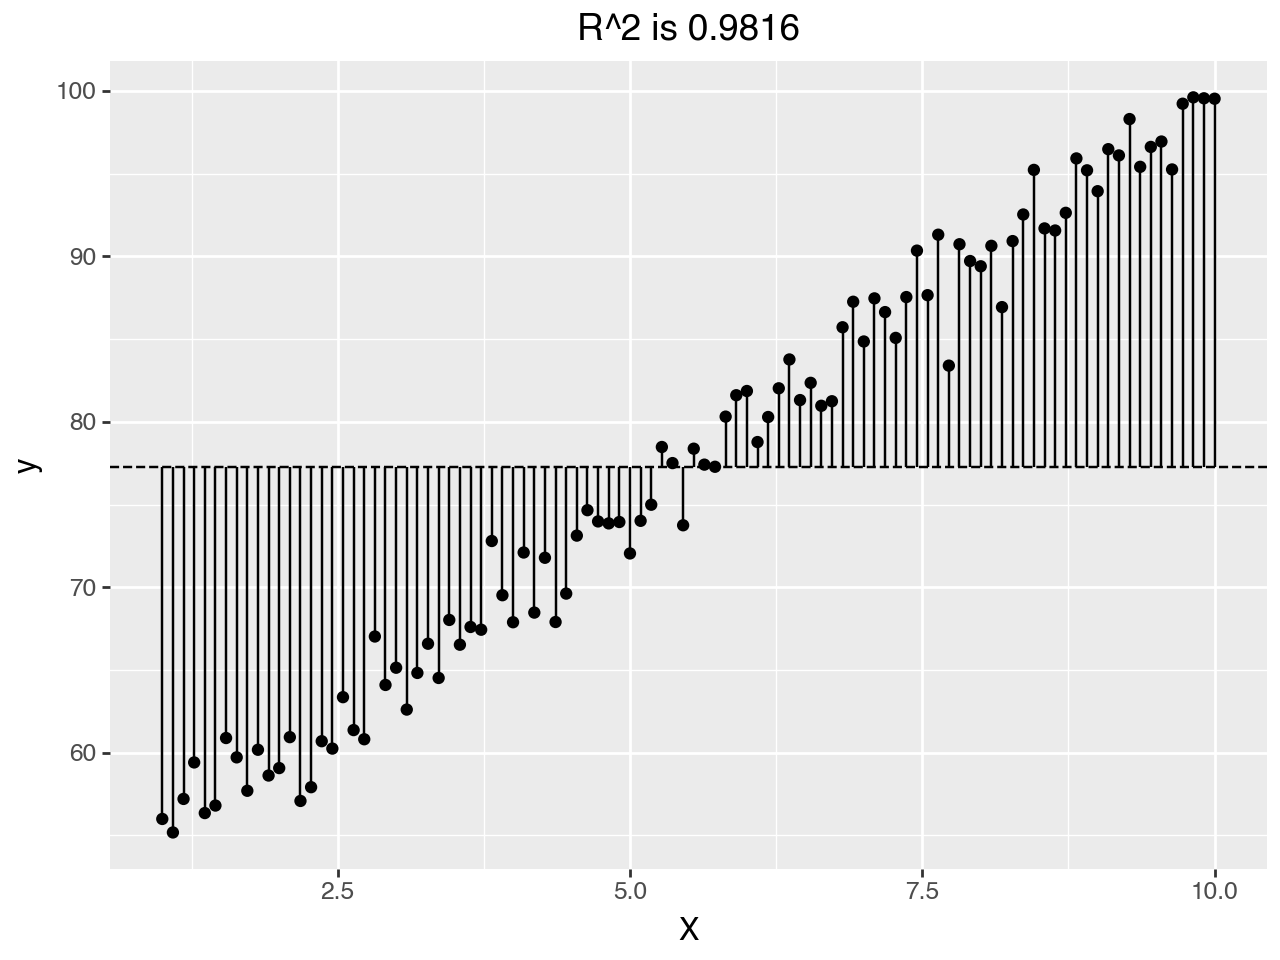

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


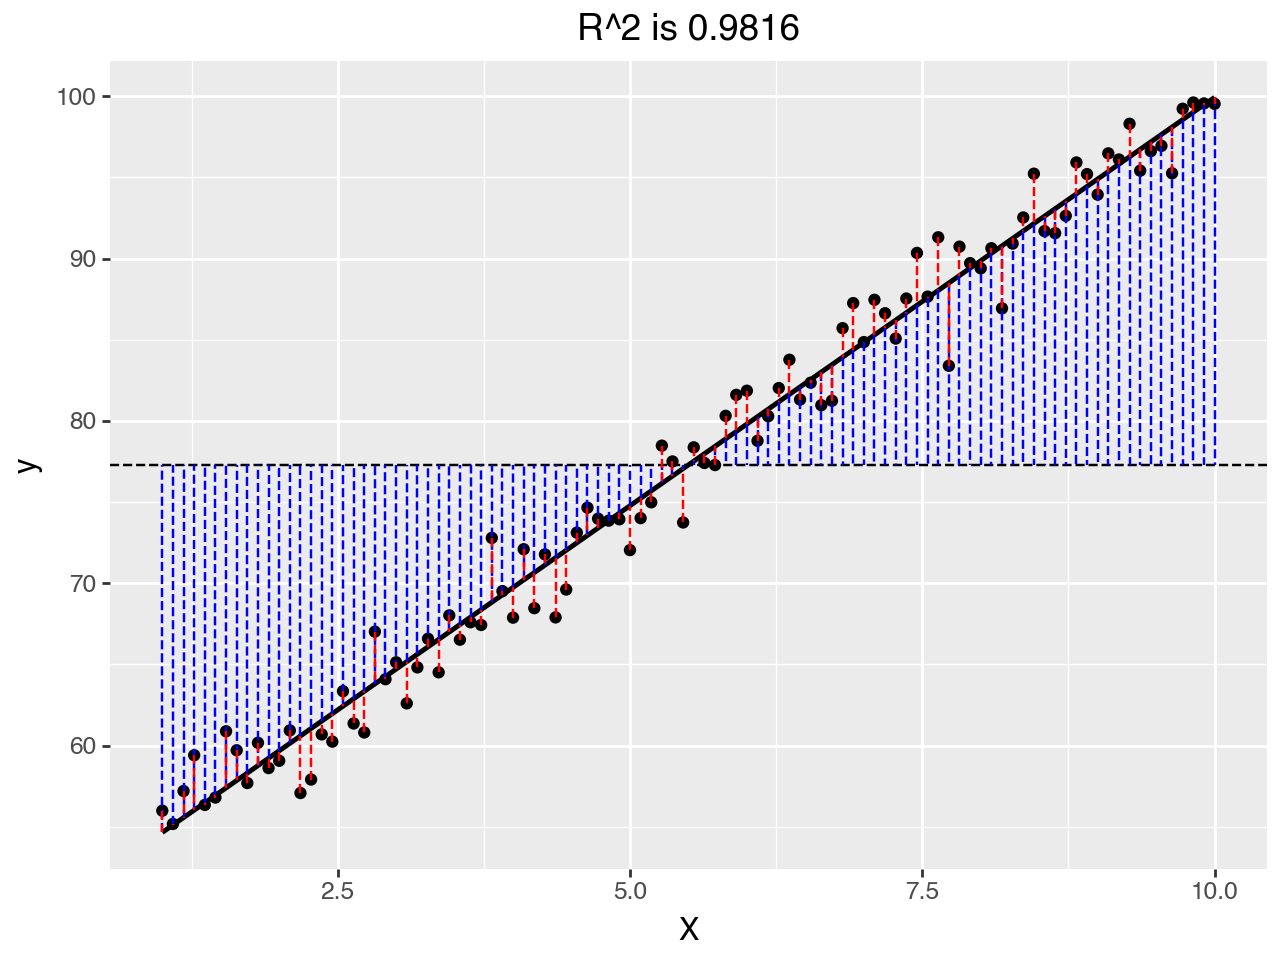

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [23]:
X, y = generate_data(sigma = 2, slope=5, intercept=50, sample_size=100)
ss_decomp(X, y, 0.05)

SST (Total Sum of Squares): 17606.9316
SSR (Regression Sum of Squares): 17246.7896
SSE (Error Sum of Squares): 360.142
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9795
Since the F statistic, 4693.108220646301, is greater than the critical value, 3.938111078003373, then we reject the null hypothesis and say X is a significant predictor of Y


/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


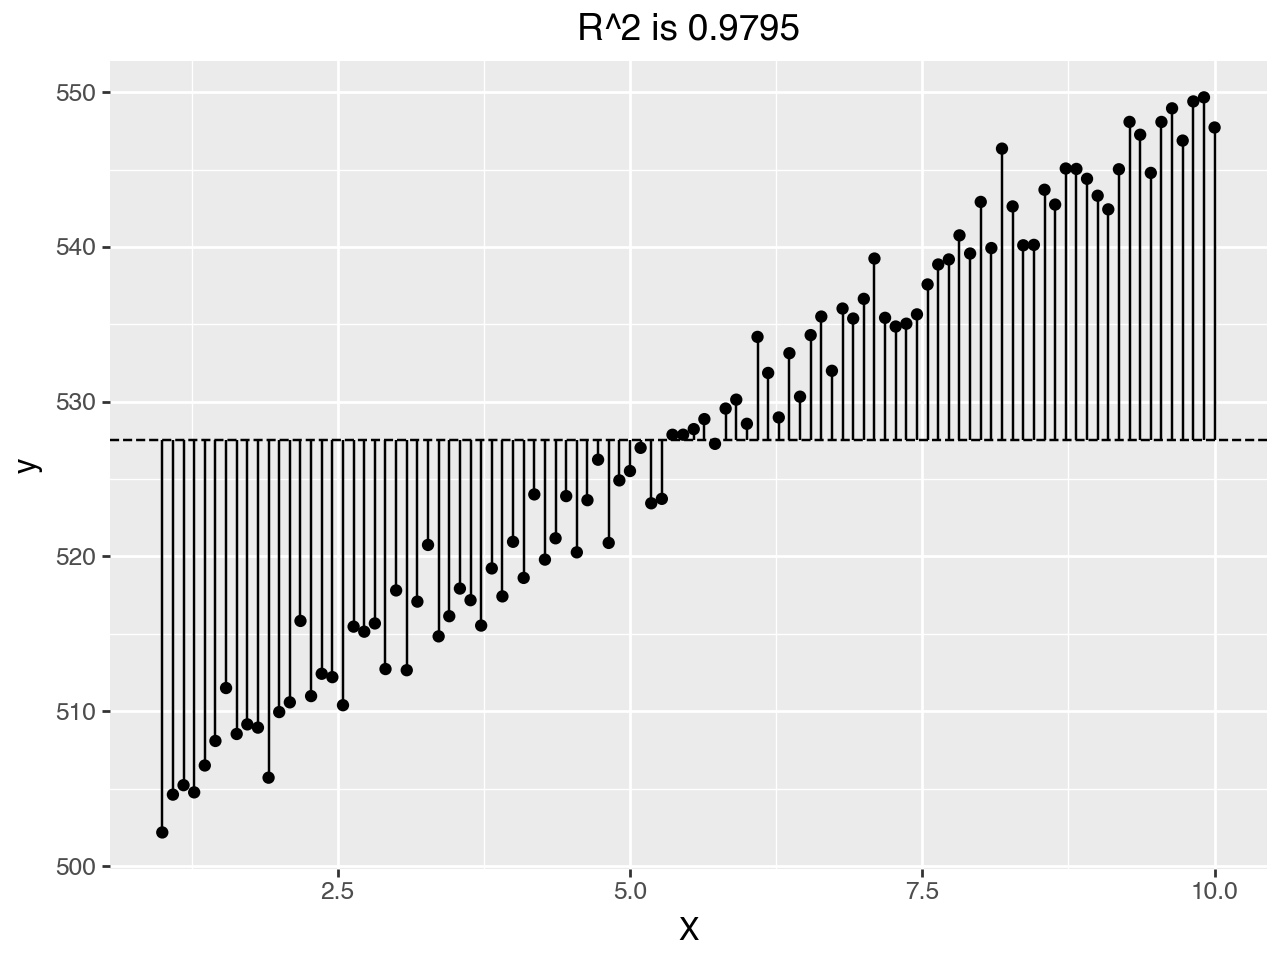

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


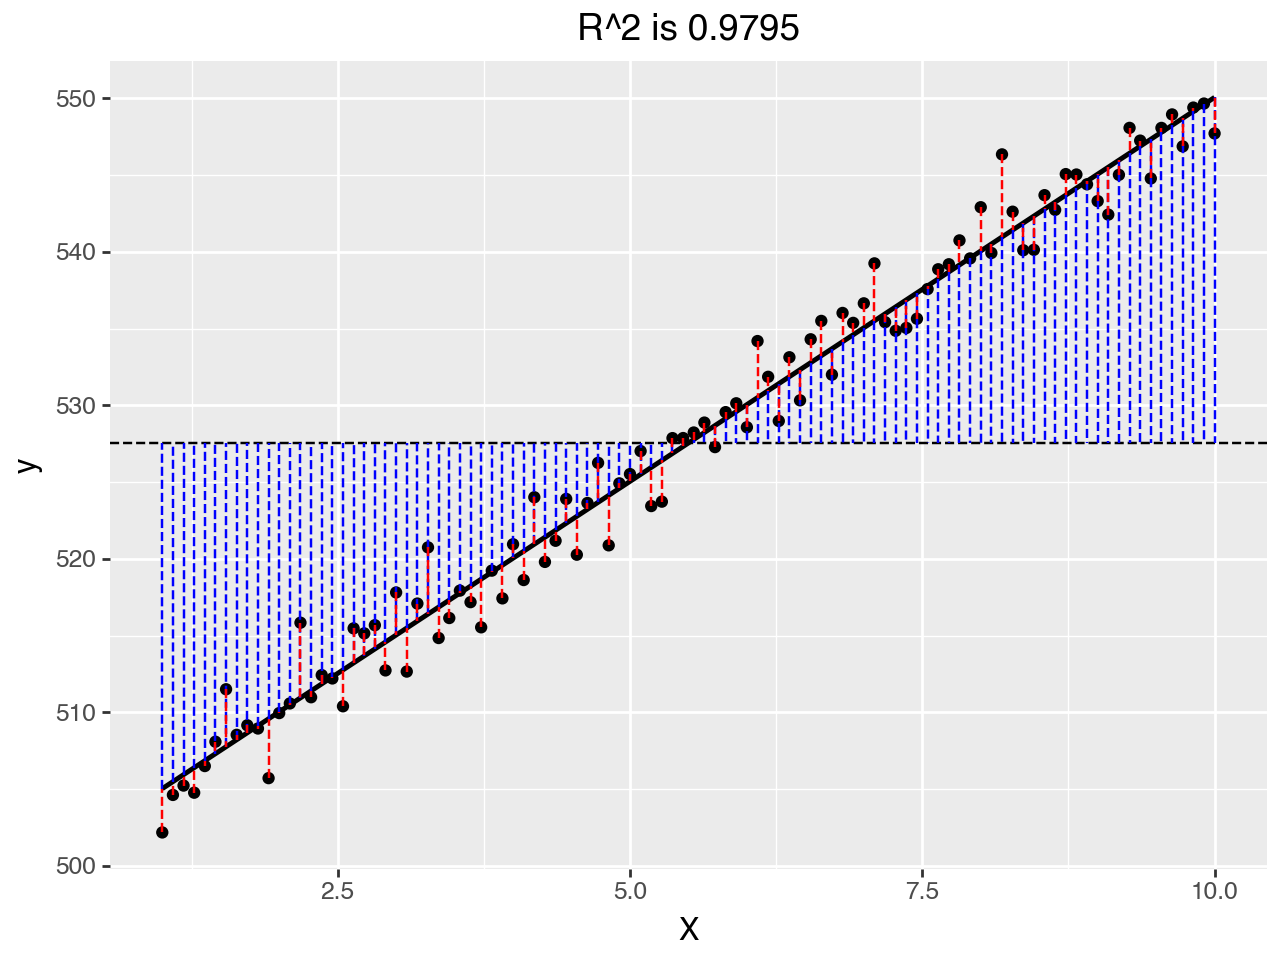

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [24]:
X, y = generate_data(sigma = 2, slope=5, intercept=500, sample_size=100)
ss_decomp(X, y, 0.05)

SST (Total Sum of Squares): 17174.5965
SSR (Regression Sum of Squares): 16712.7624
SSE (Error Sum of Squares): 461.8341
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9731
Since the F statistic, 3546.4048999413426, is greater than the critical value, 3.938111078003373, then we reject the null hypothesis and say X is a significant predictor of Y


/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


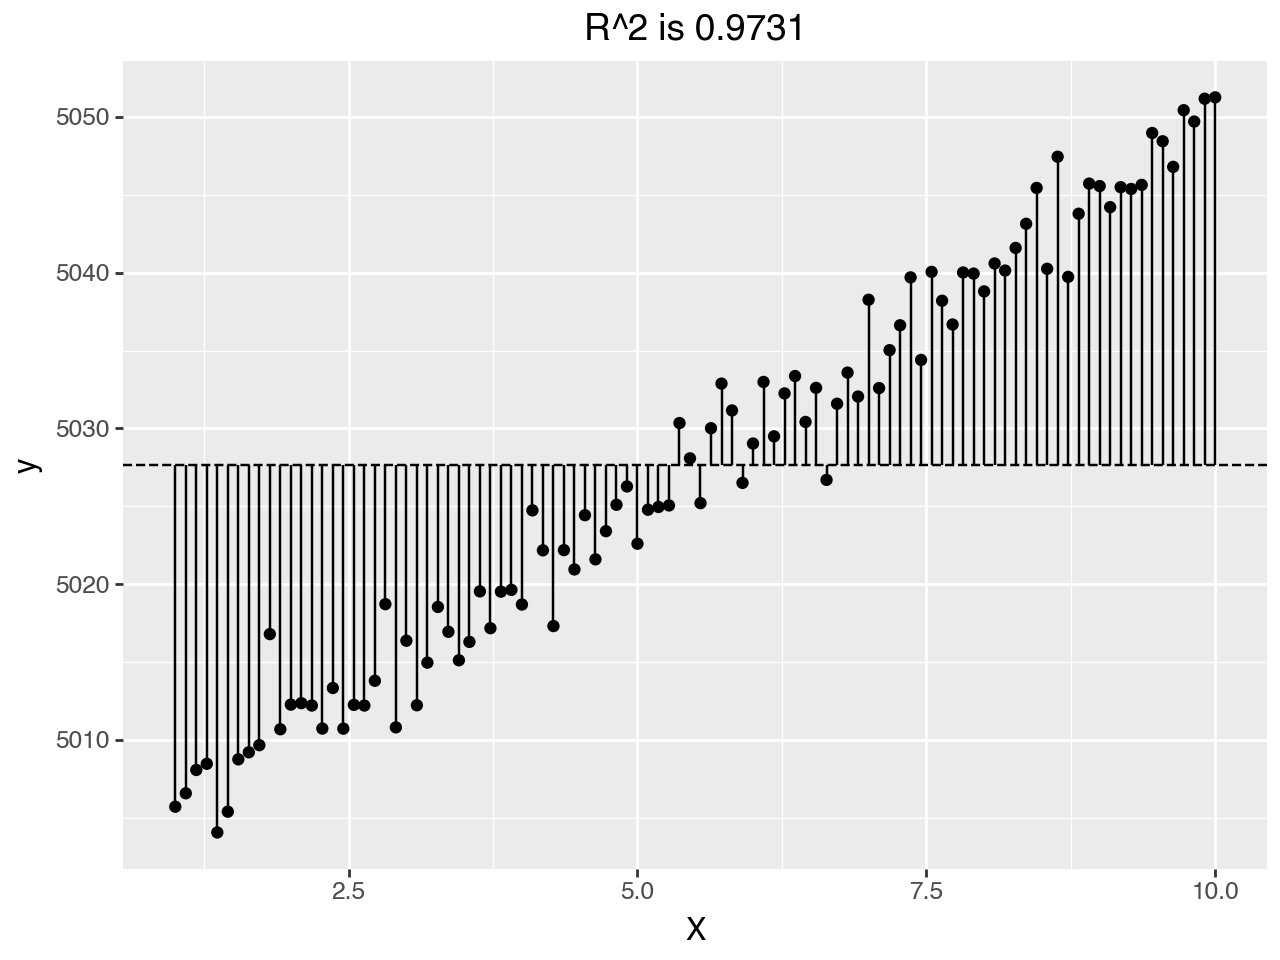

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


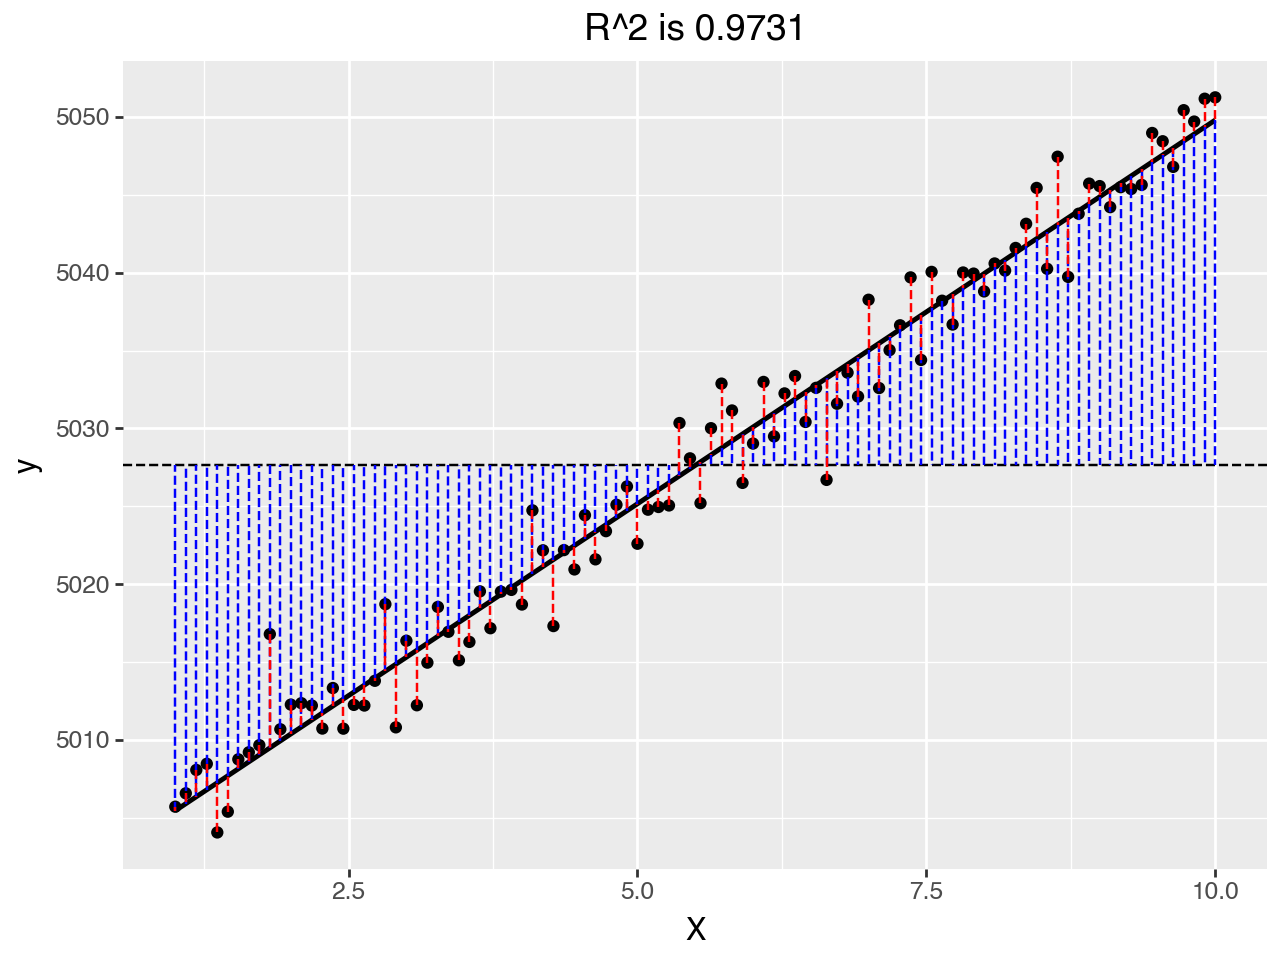

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [25]:
X, y = generate_data(sigma = 2, slope=5, intercept=5000, sample_size=100)
ss_decomp(X, y, 0.05)

SST (Total Sum of Squares): 2167.4744
SSR (Regression Sum of Squares): 2151.8264
SSE (Error Sum of Squares): 15.6481
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9928
Since the F statistic, 1100.108716074156, is greater than the critical value, 5.317655071578714, then we reject the null hypothesis and say X is a significant predictor of Y


/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


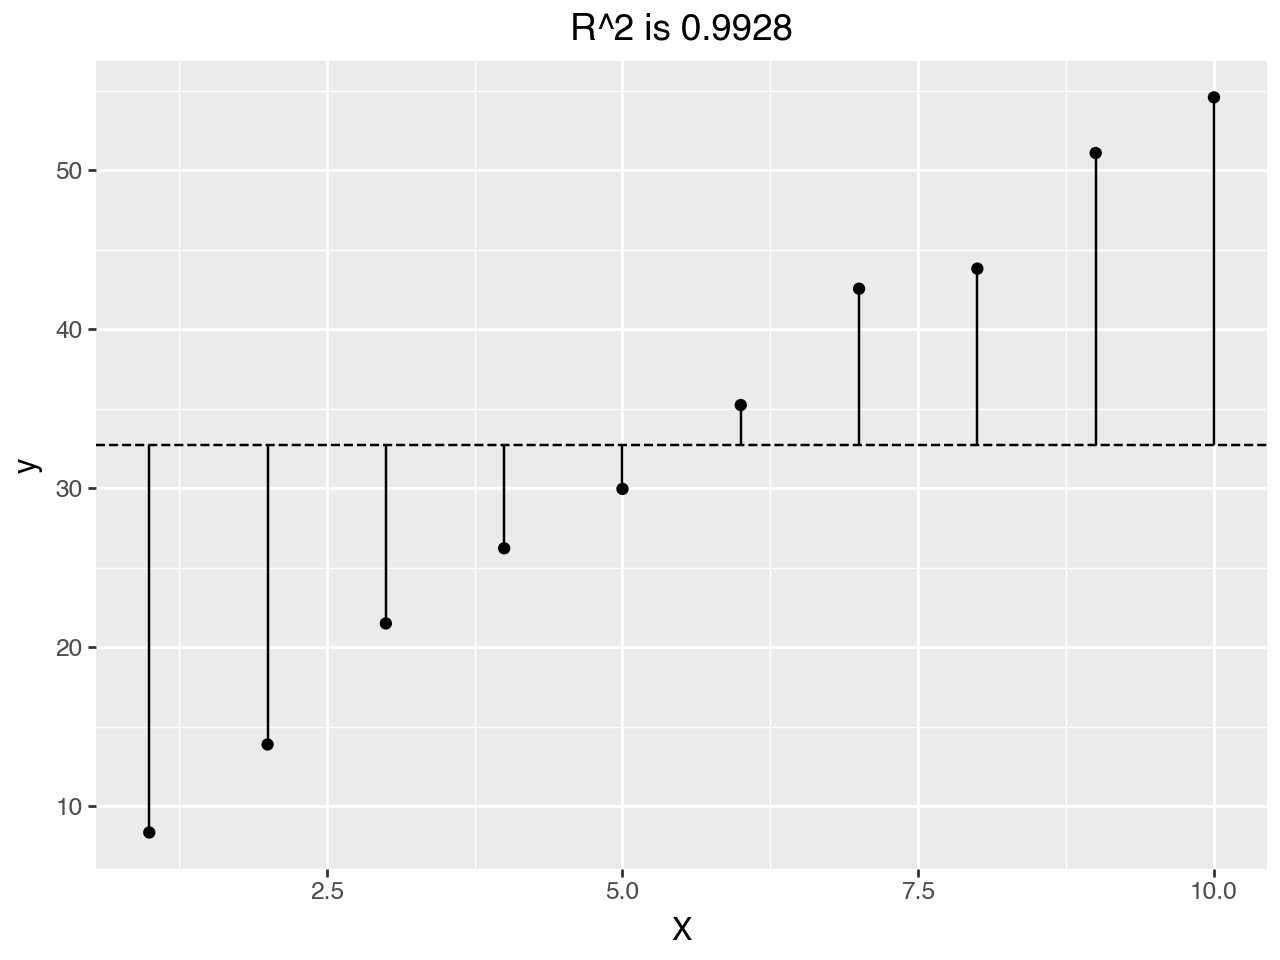

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


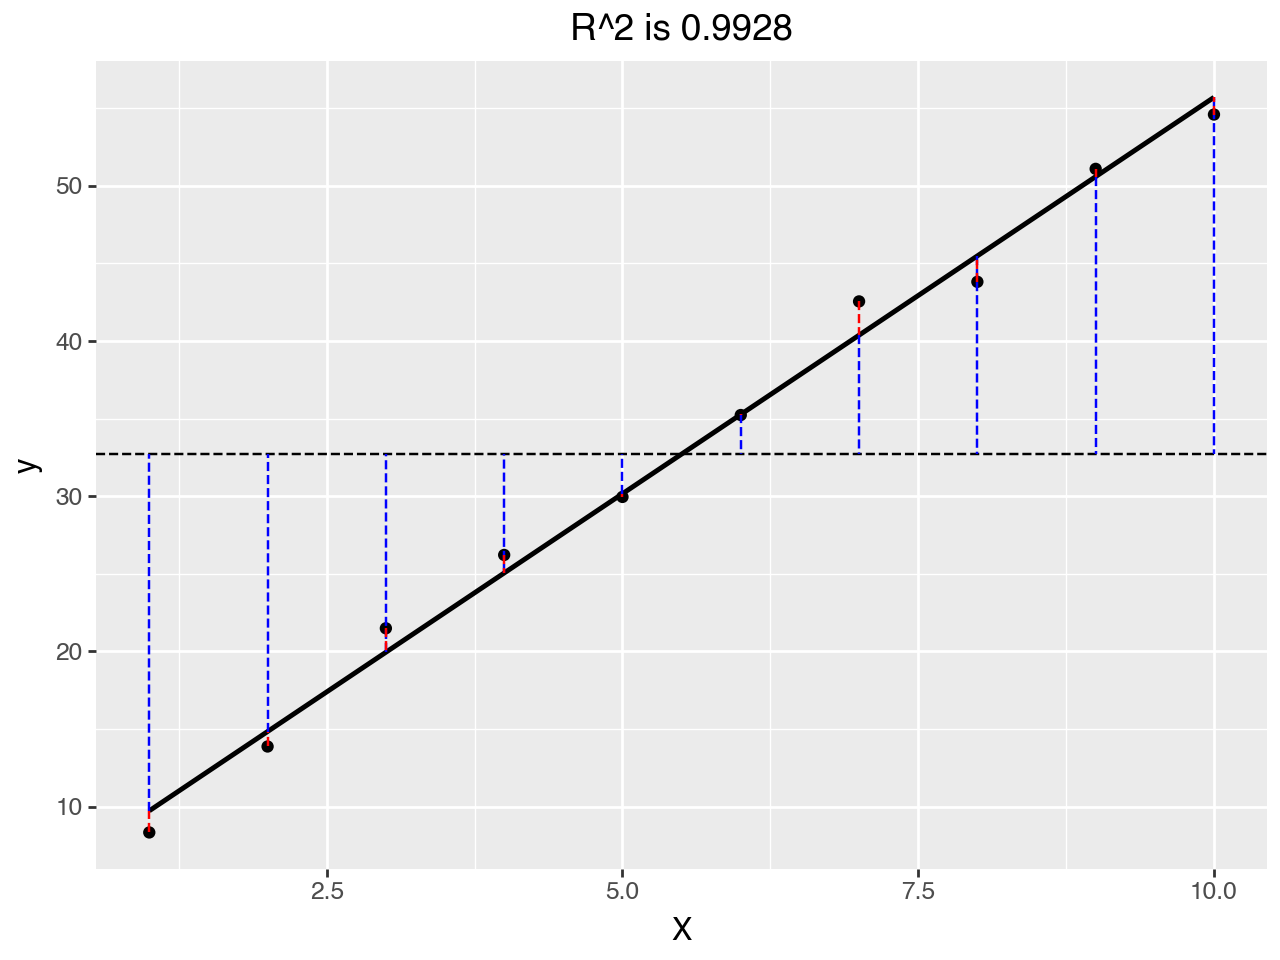

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [26]:
X, y = generate_data(sigma = 2, slope=5, intercept=5, sample_size=10)
ss_decomp(X, y, 0.05)

SST (Total Sum of Squares): 171770.7059
SSR (Regression Sum of Squares): 167840.4933
SSE (Error Sum of Squares): 3930.2127
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9771
Since the F statistic, 42619.78297342533, is greater than the critical value, 3.850793370783879, then we reject the null hypothesis and say X is a significant predictor of Y


/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


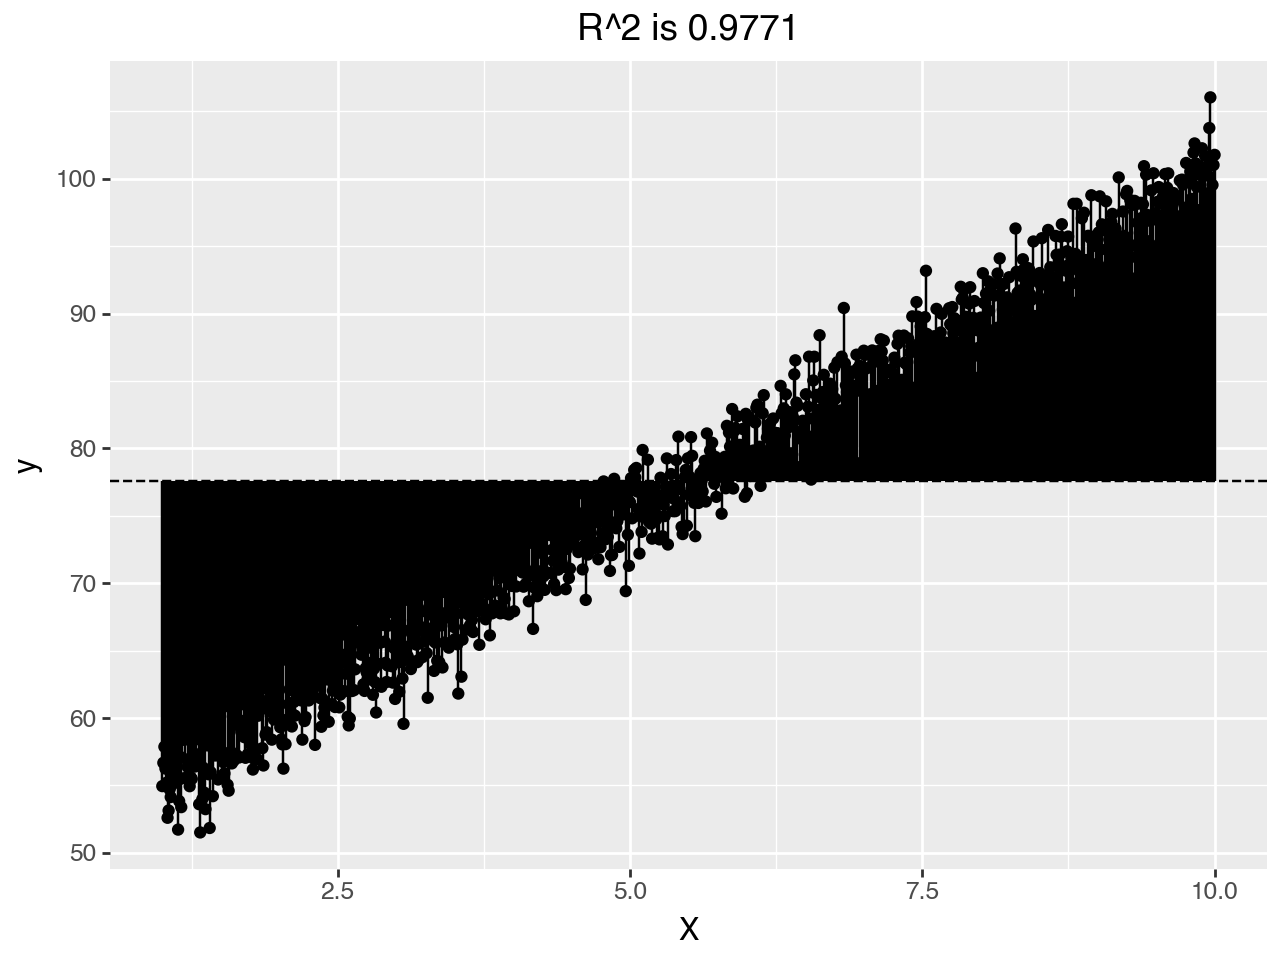

/opt/anaconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


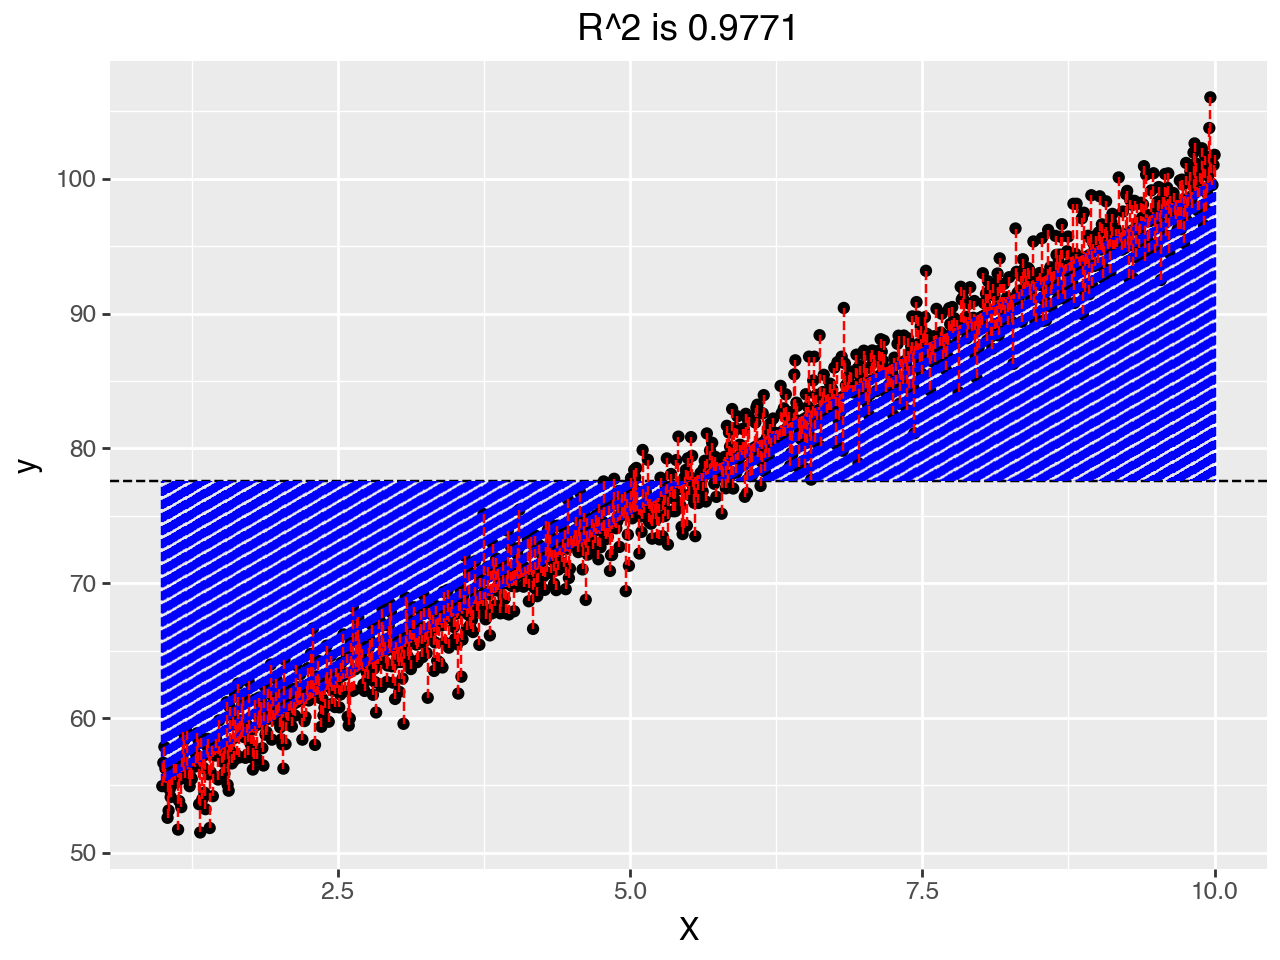

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [28]:
X, y = generate_data(sigma = 2, slope=5, intercept=50, sample_size=1000)
ss_decomp(X, y, 0.05)

In [ ]:
def t_test(X, y, alpha, sigma, true_slope):
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    beta1_hat = model.coef_

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of x
    x_mean = np.mean(X)

    SSX = np.sum((X - x_mean) ** 2).round(4)
    t = (beta1_hat - true_slope)/(sigma/math.sqrt(SSX))

## Exercises:

1. Modify the data generation function to take the slope, intercept, and sample size as arguments.
2. Modify the SS decomposition function to conduct the F-test for testing whether the true slope is zero or not.
4. Holding the intercept, sample size, and error variance constant, compare how different values of the slope affect:
   
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
5. Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
6. Holding the intercept, slope, and error variance constant, compare how different values of the sample size affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
7. Write a function which calculates the t-statistic for testing whether the true slope is zero or not. For each simulation you run, calculate both the t-stat and the F-stat. Repeat this $B=$100 times, then plot the ordered pairs $\{(t_b, F_b)\}_{b=1}^B$ as a scatter plot. What relationship do you observe between them? Can you prove this relation?